In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kyphosis = pd.read_csv("kyphosis.csv")
kyphosis


,Age,Number,Start,Kyphosis
0,71,3,5,absent
1,158,3,14,absent
2,128,4,5,present
3,2,5,1,absent
4,1,4,15,absent
5,1,2,16,absent
6,61,2,17,absent
7,37,3,16,absent
8,113,2,16,absent
9,59,6,12,present


In [3]:
x=kyphosis.drop('Kyphosis',axis=1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [4]:
y=kyphosis['Kyphosis']
y

0     absent
1     absent
2    present
3     absent
4     absent
5     absent
6     absent
7     absent
8     absent
9    present
Name: Kyphosis, dtype: object

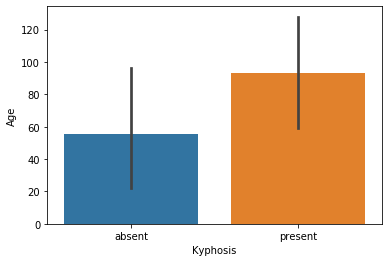

In [5]:
sns.barplot(x='Kyphosis',y='Age',data=kyphosis)

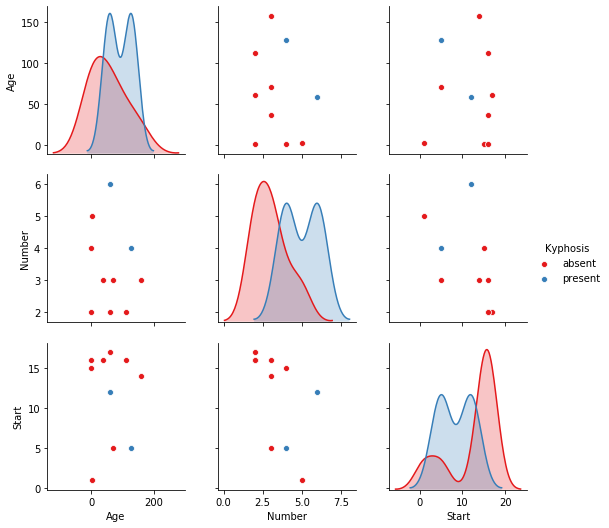

In [6]:
sns.pairplot(kyphosis,hue='Kyphosis',palette='Set1')

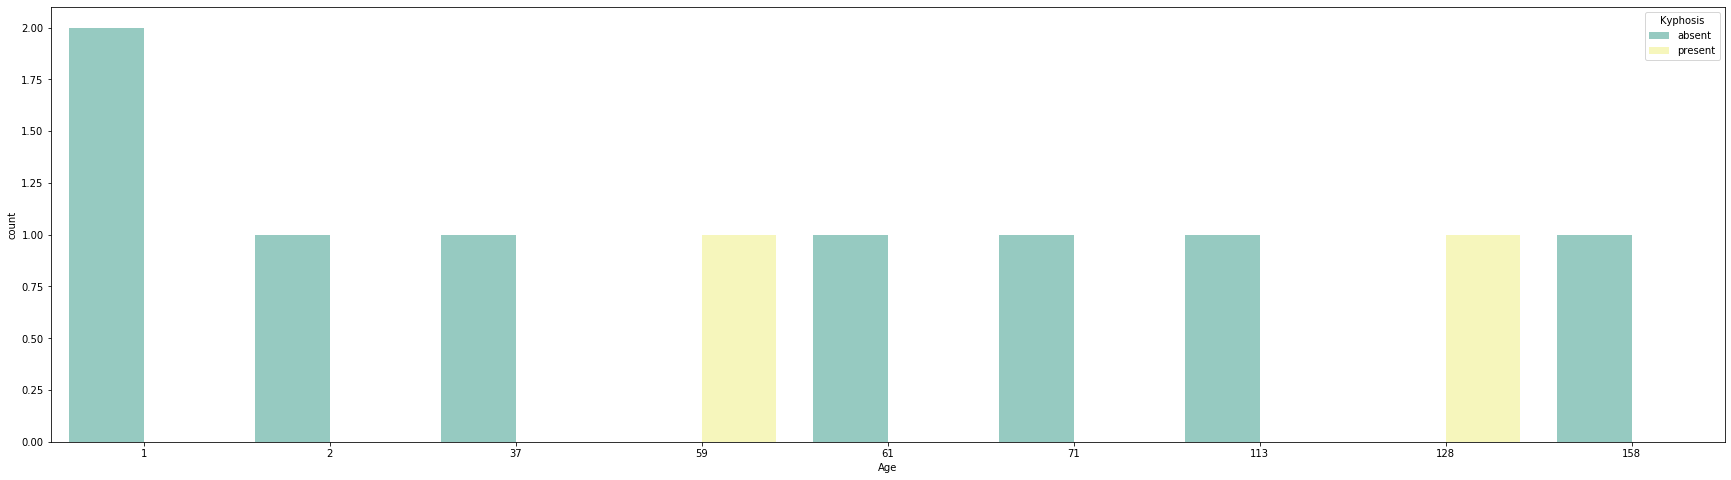

In [8]:
plt.figure(figsize=(30,8))
sns.countplot(x='Age',hue='Kyphosis',data=kyphosis,palette='Set3')

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)


In [10]:
x = kyphosis.drop('Kyphosis',axis=1)
y = kyphosis['Kyphosis']

In [11]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [12]:
x = kyphosis.drop('Kyphosis',axis=1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [13]:
y = kyphosis['Kyphosis']
y

0     absent
1     absent
2    present
3     absent
4     absent
5     absent
6     absent
7     absent
8     absent
9    present
Name: Kyphosis, dtype: object

In [14]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=100)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree=DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
predictions= dtree.predict(x_test)
predictions

array(['absent', 'absent', 'present'], dtype=object)

In [20]:
x_test

,Age,Number,Start
7,37,3,16
6,61,2,17
1,158,3,14


In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.67      0.80         3
     present       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [23]:
print(confusion_matrix(y_test,predictions))

[[2 1]
 [0 0]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rfc_pred = rfc.predict(x_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[3]]


In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

